In [0]:
from keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

import numpy as np

import tensorboardcolab

import os
import os.path

# ! pip3 install face_recognition
import face_recognition
import cv2

from PIL import Image, ImageDraw

# tbc = TensorBoardColab()

In [0]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [0]:
# !ls "/content/gdrive/My Drive/"

In [67]:
batch_size = 16

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# training_img = utils.io_utils.HDF5Matrix('../training_dataset.hdf5', 'train_img')

train_generator = train_datagen.flow_from_directory(
'/content/drive/My Drive/GANde/images/train',
target_size=(400, 400),
batch_size=batch_size,
class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
'/content/drive/My Drive/GANde/images/validation',
target_size=(400, 400),
batch_size=batch_size,
class_mode='binary')

Found 653 images belonging to 2 classes.
Found 308 images belonging to 2 classes.


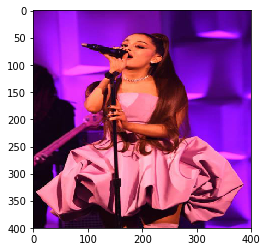

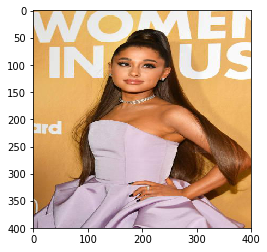

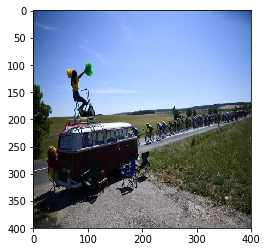

In [68]:
# Inspect images

x, y = train_generator.next()

# Display one image

for i in range (0, 3):
  image = x[i]
  plt.imshow(image)
  plt.show()

In [61]:
# Define paths using os.path.dirname() doesn't seem to work in Jupyter
# Otherwise, good practice if moving files around and keeping same structure
base_dir = '/content/gdrive/My Drive/GANde/'
# prototxt_path = os.path.join(base_dir + 'pretrained_model/deploy.prototxt.txt')

prototxt_path = '/content/drive/My Drive/GANde/pretrained_model/deploy (1).prototxt'

caffemodel_path = '/content/drive/My Drive/GANde/pretrained_model/pretrained_weights.caffemodel'
# caffemodel_path = os.path.join(base_dir + 'pretrained_model/pretrained_weights.caffemodel')

print(prototxt_path)


# Read the model
model = cv2.dnn.readNetFromCaffe(prototxt_path, caffemodel_path)

/content/drive/My Drive/GANde/pretrained_model/deploy (1).prototxt


In [0]:
%%capture

set_padding = 15

# Get all the file names. TODO: less hardcoding

# 1st test: images/train/ari ONLY

dir_list = ['/train/ari/', '/train/nonari/', '/validation/ari/', '/validation/nonari/']

run_dir_name = dir_list[2] # e.g. '/train/ari/'

faces_count = 0 
for file in os.listdir('/content/drive/My Drive/GANde/images/validation/ari'):
  file_name, file_extension = os.path.splitext(file)
  if (file_extension in ['.png', '.jpg']):
    print("Image paths: {}".format('/content/drive/My Drive/GANde/images' \
                                   + run_dir_name + file))
    
    image = cv2.imread('/content/drive/My Drive/GANde/images' \
                                   + run_dir_name + file)

    (h, w) = image.shape[:2]

    blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))
    # not sure what the last argument is

    model.setInput(blob)

    detections = model.forward()
    
    for i in range(0, detections.shape[2]):
      box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
      (startX, startY, endX, endY) = box.astype("int")
      
      confidence = detections[0, 0, i, 2]
      
      if (confidence > 0.5):
        faces_count += 1
        
        # face to save to "cropped_output" folder        
        facecrop = image[(startY - set_padding):(endY  + set_padding), \
                      (startX  - set_padding):(endX  + set_padding)]
        cv2.imwrite('/content/drive/My Drive/GANde/images/cropped_output/ari/' \
                    + str(i) + '_' + file, facecrop)
        
        # rectangle to save to "boxed_output" folder
        cv2.rectangle(image, (startX - set_padding, startY - set_padding), (endX + set_padding, endY + set_padding), (255, 255, 255), 2)
        
    cv2.imwrite('/content/drive/My Drive/GANde/images/boxed_output' \
                               + '/train/ari (1)/' + file, image)

    # Good to know: cv2.imwrite() will not create folders if don't exist

    print("Image " + file + " boxing attempt complete")

In [46]:
# Step through troubleshooting

file = 'ad5689ccfddb22d748c96a68770cdb7681702b3e.jpg'

run_dir_name = dir_list[0]

file_name, file_extension = os.path.splitext(file)

image = cv2.imread('/content/drive/My Drive/GANde/images' \
                                   + run_dir_name + file)


(h, w) = image.shape[:2]

print(h, w)

blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

model.setInput(blob)

detections = model.forward()

for i in range(0, detections.shape[2]):
  box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
  (startX, startY, endX, endY) = box.astype("int")

  confidence = detections[0, 0, 1, 2]

  if (confidence > 0.5):
    cv2.rectangle(image, (startX, startY), (endX, endY), (255, 255, 255), 2)
    # TODO: see what dimensions work best

cv2.imwrite('/content/drive/My Drive/GANde/images/boxed_output' \
                               + run_dir_name + file, image)

# Good to know: cv2.imwrite() will not create folders if don't exist

print("Image " + file + " boxing attempt complete")

407 612
Image ad5689ccfddb22d748c96a68770cdb7681702b3e.jpg boxing attempt complete
